In [9]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv('dataset.csv')
print(dataset.shape)
dataset.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [12]:
# standard linear regression formula y = mx + c
# y(Y) is the dependent variable,
# m is the scale factor or coefficient, b being the bias coefficient and X(X) being the independent variable
# m is the slope of the line and c is the y-intercept.

# m = [E(n, i =1)(X(i)-X_mean)*(Y(i)-Y_mean)] / [E(n, i =1)(X(i)-X_mean)^2]
# c = y_mean - (b1 * x_mean)

In [19]:
#Let's find the relationship between the Head Size and Brain weights.

#initializing input and output
X = dataset["Head Size(cm^3)"].values
Y = dataset["Brain Weight(grams)"].values

#mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)

#total number of values
n = len(X)

#using the formula to calculate the m and c
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i]-x_mean) * (Y[i]-y_mean)
    denominator += (X[i] - x_mean)**2
    
m = numerator / denominator
c = y_mean - (m*x_mean)

#printing the coefficient
print(m, c)
    
print("Now we have a linear model")
print("Brain weights =", m,"* Head size +",c)

0.26342933948939945 325.57342104944223
Now we have a linear model
Brain weights = 0.26342933948939945 * Head size + 325.57342104944223


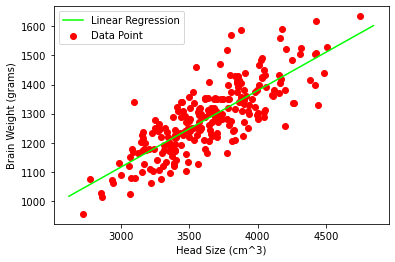

In [35]:
#lets plot values graphically
#plotting values 
x_max = np.max(X) + 100
x_min = np.min(X) - 100


#calculating line values of x and y
#The NumPy linspace function creates sequences of evenly spaced values within a defined interval
#np.linspace(start, stop, num of items to be generated)
x = np.linspace(x_min, x_max, 1000)
y = c + m * x

#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')

#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')

# x-axis label
plt.xlabel('Head Size (cm^3)')

#y-axis label
plt.ylabel('Brain Weight (grams)')

plt.legend()
plt.show()

In [36]:
#We need to able to measure how good our model is (accuracy). There are many methods to achieve this but 
#we would implement "Root mean squared error" and "coefficient of Determination (R² Score)""

#RMSE = 1/n * E(n, j =1)(y(i)-y(j))**2
#y(j) is the ith predicted output values

rmse = 0
for i in range(n):
    y_pred=  c + m* X[i]
    rmse += (Y[i] - y_pred) ** 2

rmse = np.sqrt(rmse/n)

print(rmse)

72.1206213783709


In [37]:
#find our R²(coefficient of determination) score to be able to measure the accuracy of our linear mode
#R² = E(Y - y_mean) ** 2 / E(Y - y_pred)**2
#R² Score usually ranges from 0 to 1. It will also become negative if the model is completely wrong

sumofsquares = 0 #(Y - y_pred)**2
sumofresiduals = 0 #(Y - y_mean) ** 2 

for i in range(n) :
    y_pred = c + m * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)

print(score)

0.6393117199570003


0.63 is certainly not bad, but we can improve the score by :
>>Getting more datasets
>>Improving the features
>>Fit many models etc
